# 🌳 분류 모델: 의사결정나무 & 랜덤포레스트

---

## 1️⃣ 의사결정나무 (Decision Tree)

### 개념

의사결정나무는 **질문을 반복해서 데이터를 분류하는 모델**이다.

예시:
- "키가 170cm 이상인가?"
- "소득이 3000만원 이상인가?"
- "나이가 30세 이상인가?"

이처럼 **Yes / No 질문을 계속 나누어 최종 분류**한다.

---

### 🌲 작동 원리

1. 데이터를 가장 잘 나누는 질문을 찾는다.
2. 두 그룹으로 분리한다.
3. 각 그룹에서 다시 가장 좋은 질문을 찾는다.
4. 반복한다.

---

### 📊 불순도(Impurity)

좋은 분할이란?

👉 한 그룹 안에 **한 종류의 데이터만 많을수록 좋다**

대표적인 기준:
- Gini Index
- Entropy (정보이득)

---

### 장점

- 직관적이고 이해하기 쉬움
- 데이터 스케일링 필요 없음
- 비선형 관계 학습 가능

### ❌ 단점

- 과적합 잘 발생
- 데이터에 민감함
- 조금만 데이터 바뀌어도 구조 크게 변함

---

## 2️⃣ 랜덤포레스트 (Random Forest)

### 📌 개념

랜덤포레스트는 **의사결정나무를 여러 개 만들어서 평균(투표)하는 모델**이다.

👉 Tree 1의 예측
👉 Tree 2의 예측
👉 Tree 3의 예측
👉 ...
👉 다수결로 최종 결정

---

### 🌳 왜 여러 개를 쓰는가?

의사결정나무는 과적합이 잘 발생한다.

그래서:
- 여러 개의 나무를 만들고
- 서로 다른 데이터로 학습시키고
- 결과를 평균내면

👉 더 안정적이고 정확해진다.

---

### 🎲 랜덤성(Random)이 들어가는 이유

1. 데이터 일부만 사용 (Bootstrap Sampling)
2. 특성 일부만 사용

그래서 이름이 **Random Forest**

---

### 장점

- 성능이 매우 좋음
- 과적합 감소
- 변수 중요도 제공

### ❌ 단점

- 모델이 복잡함
- 해석이 어려움
- 학습 시간이 Decision Tree보다 길다

---

## 3️⃣ 의사결정나무 vs 랜덤포레스트 비교

| 구분 | 의사결정나무 | 랜덤포레스트 |
|------|--------------|--------------|
| 구조 | 나무 1개 | 나무 여러 개 |
| 과적합 | 높음 | 낮음 |
| 해석 | 쉬움 | 어려움 |
| 성능 | 보통 | 높음 |
| 계산량 | 적음 | 많음 |

---

## 4️⃣ 언제 사용하면 좋을까?

✔ 빠르게 결과 확인 → Decision Tree  
✔ 높은 성능 필요 → Random Forest  
✔ 변수 중요도 확인 → Random Forest  

---

## 5️⃣ 한 줄 요약

🌲 의사결정나무: 질문을 반복해 분류하는 모델  
🌳 랜덤포레스트: 여러 나무를 만들어 평균내는 모델  

---

##🎯 핵심 정리

- 둘 다 비선형 모델
- 스케일링 필요 없음
- 분류 & 회귀 모두 가능
- 랜덤포레스트가 일반적으로 더 강력함


In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt

# 1) 데이터 로드
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")  # 0=malignant, 1=benign

print("X shape:", X.shape)
print("클래스 분포:\n", y.value_counts())


X shape: (569, 30)
클래스 분포:
 target
1    357
0    212
Name: count, dtype: int64


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (455, 30) Test: (114, 30)


In [4]:
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=4  # 과적합 방지(깊이 제한) - 실전에서 자주 조절
)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print("✅ Decision Tree")
print(f"Accuracy: {dt_acc:.4f}")
print(f"F1-score : {dt_f1:.4f}")
print("\n[Classification Report]\n", classification_report(y_test, dt_pred, target_names=data.target_names))
print("[Confusion Matrix]\n", confusion_matrix(y_test, dt_pred))

✅ Decision Tree
Accuracy: 0.9386
F1-score : 0.9510

[Classification Report]
               precision    recall  f1-score   support

   malignant       0.91      0.93      0.92        42
      benign       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

[Confusion Matrix]
 [[39  3]
 [ 4 68]]


In [5]:
rf = RandomForestClassifier(
    n_estimators=300,      # 나무 개수
    random_state=42,
    max_depth=None,        # 필요 시 제한 가능
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("✅ Random Forest")
print(f"Accuracy: {rf_acc:.4f}")
print(f"F1-score : {rf_f1:.4f}")
print("\n[Classification Report]\n", classification_report(y_test, rf_pred, target_names=data.target_names))
print("[Confusion Matrix]\n", confusion_matrix(y_test, rf_pred))


✅ Random Forest
Accuracy: 0.9474
F1-score : 0.9583

[Classification Report]
               precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        42
      benign       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[Confusion Matrix]
 [[39  3]
 [ 3 69]]


# 앙상블 학습 (Ensemble Learning): 배깅과 부스팅

모델 학습 단계에서 단일 모델의 성능을 뛰어넘기 위해 여러 개의 모델을 조합하여 사용하는 기법을 **앙상블 학습(Ensemble Learning)**이라고 합니다.

> **비유:** 어려운 문제를 풀 때 한 명의 똑똑한 전문가에게 물어보는 것보다, 여러 명의 다양한 의견을 종합해서 결론을 내리는 것이 더 정확하고 안정적인 것과 같습니다.

배깅(Bagging)과 부스팅(Boosting)은 이 앙상블 학습의 가장 대표적인 두 가지 방법론입니다.

---

## 1. 배깅 (Bagging - **B**ootstrap **Agg**regat**ing**)

배깅은 **"여러 모델을 독립적으로 '병렬'로 학습시키고, 그 결과를 합쳐서(평균 내서) 최종 결과를 내는 방식"**입니다.

### 1.1. 핵심 메커니즘

1.  **데이터 샘플링 (Bootstrap):**
    * 원본 데이터셋에서 '복원 추출'(한 번 뽑은 데이터를 다시 주머니에 넣고 또 뽑을 수 있음)을 통해 동일한 크기의 여러 작은 데이터셋(샘플)을 만듭니다.
    * 이렇게 하면 데이터셋마다 구성이 조금씩 달라집니다.
2.  **병렬 학습:**
    * 만들어진 작은 데이터셋 각각에 대해 별도의 모델을 동시에 학습시킵니다.
    * 이때 각 모델들은 서로의 존재를 모르며 독립적입니다.
3.  **결과 취합 (Aggregating):**
    * **분류(Classification) 문제:** 다수결 투표 (가장 많은 모델이 선택한 클래스를 최종 결과로 선정)
    * **회귀(Regression) 문제:** 평균값 계산 (각 모델의 예측값들을 평균 내어 최종 결과로 사용)

### 1.2. 왜 사용할까요? (목적: 분산 감소)

* 모델이 특정 데이터에 너무 민감하게 반응하는 것(**과적합, Overfitting**)을 방지합니다.
* 여러 모델의 의견을 종합하므로 예측 결과가 안정적입니다.

> **비유:** 여러 명의 학생에게 같은 문제집을 주되, 각자 무작위로 선택된 페이지만 풀게 합니다. 나중에 모든 학생의 답을 모아 다수결로 정답을 정하는 것과 유사합니다.

**대표적인 알고리즘:** 랜덤 포레스트 (Random Forest)

---

## 2. 부스팅 (Boosting)

부스팅은 **"여러 모델을 '순차적'으로 학습시키되, 이전 모델이 틀린(오답) 부분을 다음 모델이 집중적으로 학습하여 성능을 높이는 방식"**입니다.

### 2.1. 핵심 메커니즘

1.  **순차 학습 시작:** 첫 번째 모델(약한 모델)을 학습시킵니다.
2.  **오답 노트 및 가중치 부여:**
    * 첫 번째 모델이 예측에 실패한 데이터들을 찾아냅니다.
    * 틀린 데이터에 더 높은 **가중치(Weight)**를 부여하여 중요도를 높입니다.
3.  **다음 모델 학습:** 두 번째 모델은 가중치가 높아진(이전 모델이 어려워했던) 데이터에 더 집중하여 학습합니다.
4.  **반복:** 이 과정을 계속 반복하여, 약한 모델들을 연속적으로 연결해 강력한 하나의 모델을 만듭니다.

### 2.2. 왜 사용할까요? (목적: 편향 감소 및 정확도 향상)

* 단순하고 약한 모델(Weak Learner)들을 결합하여 높은 정확도를 가진 강한 모델(Strong Learner)을 만듭니다.
* 틀린 문제에 집중하기 때문에 학습 데이터에 대한 정확도가 매우 높아집니다. (단, 과적합의 위험이 배깅보다 높을 수 있습니다.)

> **비유:** 학생이 모의고사를 본 뒤, 틀린 문제들만 모아서 '오답 노트'를 만듭니다. 다음 시험 공부를 할 때는 이 오답 노트에 있는 문제들을 집중적으로 파고들어 성적을 올리는 과정과 같습니다.

**대표적인 알고리즘:** XGBoost, LightGBM, CatBoost, AdaBoost

---

## 3. 요약 비교표

| 특징 | 배깅 (Bagging) | 부스팅 (Boosting) |
| :--- | :--- | :--- |
| **학습 방식** | **병렬적** (동시에 여러 모델) | **순차적** (하나씩 이어서) |
| **핵심 아이디어** | 복원 추출(Bootstrap)로 데이터 다양성 확보 | 이전 모델이 틀린 데이터에 가중치 부여 |
| **모델 간 관계** | 서로 독립적 | 서로 의존적 (앞 모델이 뒤에 영향) |
| **주요 목적** | **분산(Variance) 감소**<br>(안정성 확보, 과적합 방지) | **편향(Bias) 감소**<br>(정확도 향상, 약점을 강점으로) |
| **대표 모델** | 랜덤 포레스트 | XGBoost, LightGBM, CatBoost |

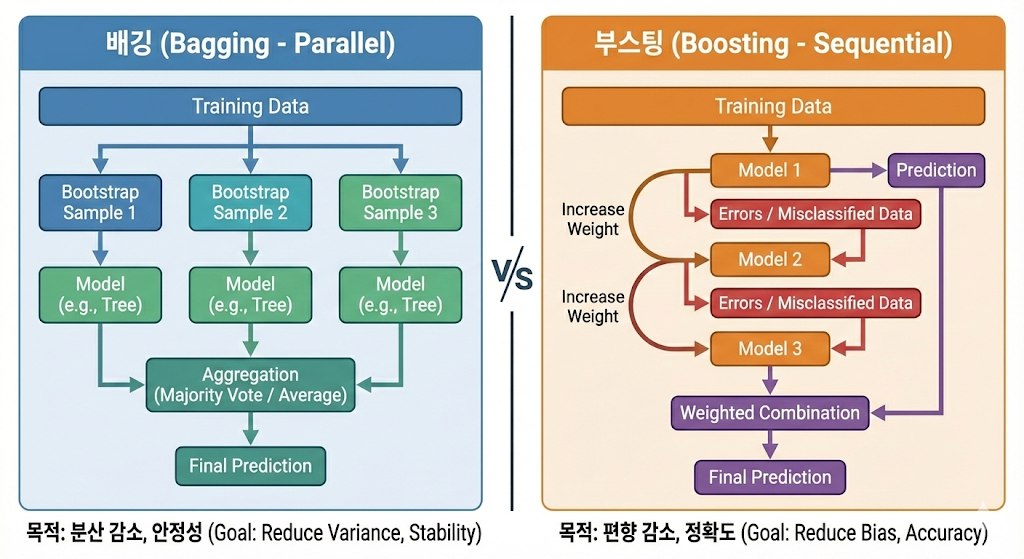